In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
oliv = datasets.fetch_olivetti_faces()

In [6]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [8]:
oliv['data'].shape

(400, 4096)

In [11]:
oliv['images'].shape

(400, 64, 64)

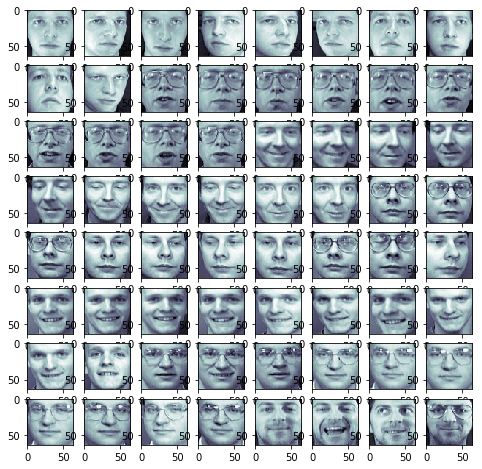

In [13]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i], cmap=plt.cm.bone)
plt.show()

In [14]:
x = oliv.data
y = oliv.target

In [15]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.components_.shape

(400, 4096)

In [20]:
k = 0
total = sum(pca.explained_variance_)
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k+=1
k 

123

In [22]:
pca = PCA(n_components=k, whiten=True)
transormed_data = pca.fit_transform(x)
transormed_data.shape

(400, 123)

In [24]:
x_approx = pca.inverse_transform(transormed_data)
x_approx.shape

(400, 4096)

In [25]:
x_approx_images = x_approx.reshape((400,64,64))

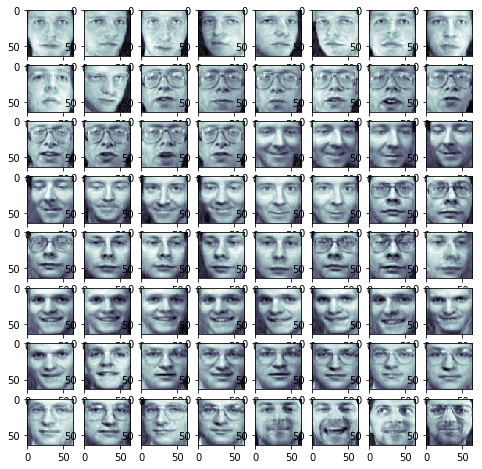

In [27]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i], cmap=plt.cm.bone)
plt.show()

In [28]:
eigen_vec = pca.components_
eigen_vec.shape

(123, 4096)

In [30]:
eigen_faces = eigen_vec.reshape((123,64,64))

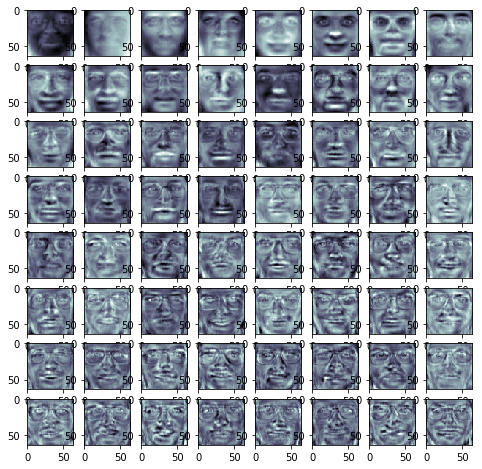

In [31]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigen_faces[i], cmap=plt.cm.bone)
plt.show()

In [34]:
print(oliv.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========